In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
data= pd.read_csv('popdata.csv', parse_dates=True)
df = data[data['pop_name'] == "Sus cebifrons (Visayan Warty Pig)"]
df = df[['pop_date','population_no']]
df['pop_date'] = pd.to_datetime(df['pop_date'])
df = df.groupby('pop_date')['population_no'].sum().reset_index()
df = df.set_index('pop_date')
df.index

DatetimeIndex(['2016-01-04', '2016-02-01', '2016-03-07', '2016-04-04',
               '2016-05-02', '2016-06-06', '2016-07-04', '2016-08-01',
               '2016-09-05', '2016-10-03', '2016-11-07', '2016-12-05',
               '2017-01-03', '2017-02-06', '2017-03-06', '2017-04-03',
               '2017-05-02', '2017-06-05', '2017-07-03', '2017-08-07',
               '2017-09-04', '2017-10-02', '2017-11-06', '2017-12-04',
               '2018-01-03', '2018-02-05', '2018-03-05', '2018-04-02',
               '2018-05-07', '2018-06-04', '2018-07-02', '2018-08-06',
               '2018-09-03', '2018-10-01', '2018-11-05', '2018-12-07',
               '2019-01-07', '2019-02-04', '2019-03-04', '2019-04-01',
               '2019-05-06', '2019-06-03', '2019-07-01', '2019-08-05',
               '2019-09-02', '2019-10-07', '2019-11-04', '2019-12-02',
               '2020-01-06', '2020-02-03', '2020-03-02', '2020-04-06',
               '2020-05-04', '2020-06-01', '2020-07-06', '2020-08-03',
      

In [3]:
y = df['population_no'].resample('M').mean()

In [4]:
y['2016':]

pop_date
2016-01-31    12.0
2016-02-29    12.0
2016-03-31    13.0
2016-04-30    13.0
2016-05-31    13.0
              ... 
2021-07-31    14.0
2021-08-31    14.0
2021-09-30    14.0
2021-10-31    14.0
2021-11-30    14.0
Freq: M, Name: population_no, Length: 71, dtype: float64

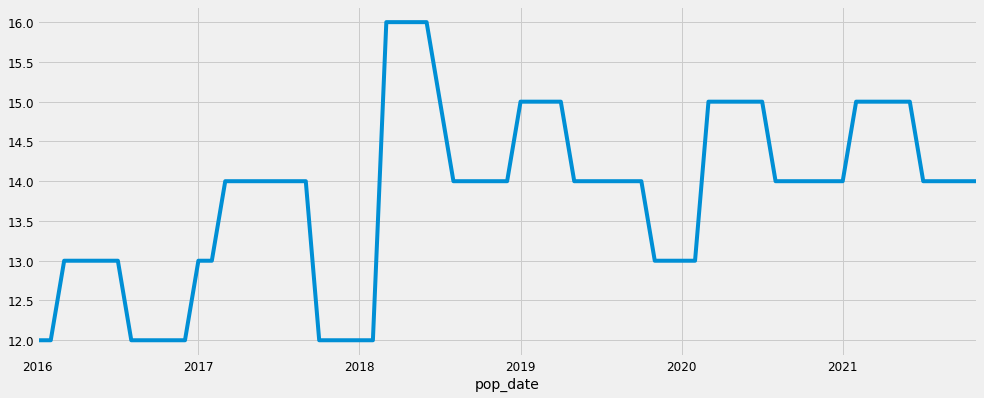

In [5]:
y.plot(figsize=(15, 6))
plt.show()

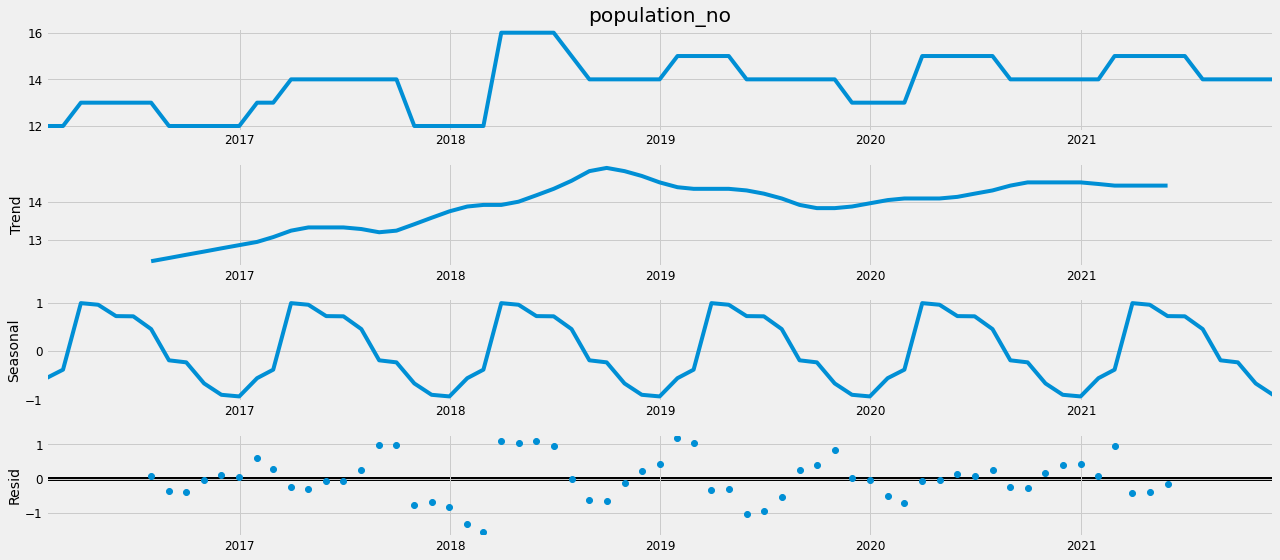

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [7]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:576.9690844551078
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:514.4043332515125
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:198.15658102611596
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:188.88091805220276
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:296.48699756094356
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:287.6841134838622
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:186.86115251208122
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:188.85790248313145
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:490.3015433063154
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:428.8893782451794
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:170.36356801525474
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:157.2239672603998
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:256.8858465817257


C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:244.15949583603899
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:154.34111239979765
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:156.2957611543354
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:154.1030533972435
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:155.36619487539613
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:165.58814877645057
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:131.35972343558
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:154.7804290803165
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:148.64099361452077
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:131.7523753134555
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:126.28833934314675
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:156.05250156865472
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:157.33153332022525
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:167.5649658200554
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:132.71469232047457
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:156.75922166734964
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:150.48460136738618
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:133.02075149277005


C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:165.29197946164336
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:160.84405049545578
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:131.37378031462492
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:164.67982153902523
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:157.33096605176505
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:130.2348065283211
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:127.30742776739147
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:165.977843148186
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:168.03350494824423
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:161.58919747897923
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:133.361377056917
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:166.65667943903352


C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:164.60512508557645
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:132.21759464895757
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:128.79798952520608
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:156.04978123327297
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:157.33077607378877
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:167.57059700938487
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:132.81356525669847
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:156.7593077693921


C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:150.49711601766015
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:133.12578497377297
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:126.84050183107958
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:153.17930253650212
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:154.0873618416833
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:161.74457646719748
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:129.7281319014755
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:153.17139825967195


C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:146.13014558547775
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:130.74983537504977
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:125.60196049305672


In [9]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5055      0.172      2.942      0.003       0.169       0.842
ma.L1         -0.7259      0.201     -3.615      0.000      -1.119      -0.332
ar.S.L12      -0.6423      0.078     -8.276      0.000      -0.794      -0.490
ma.S.L12      -0.3677      0.144     -2.550      0.011      -0.650      -0.085
sigma2         0.2778      0.060      4.626      0.000       0.160       0.396


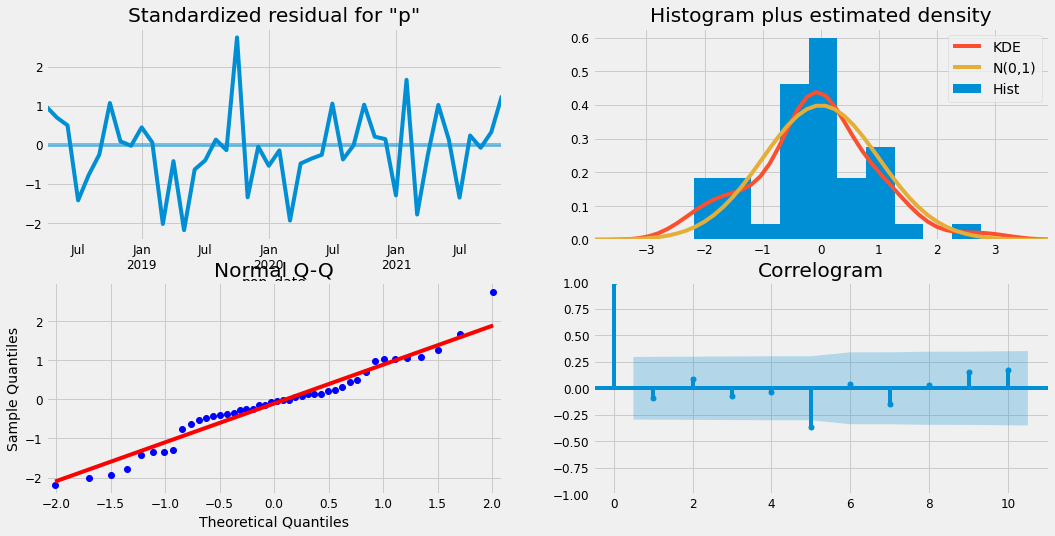

In [10]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

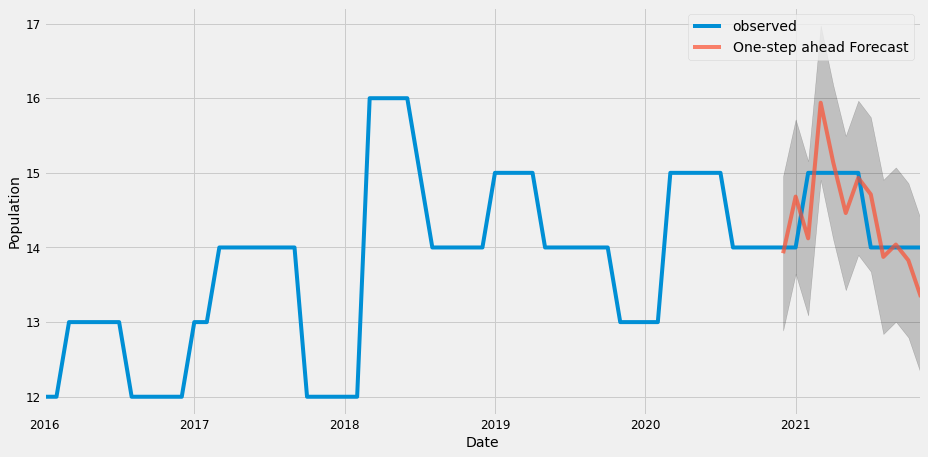

In [11]:
pred = results.get_prediction(start=pd.to_datetime('2020-12-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Population')
plt.legend()
plt.show()

In [12]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-12-31':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.29


In [13]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.53


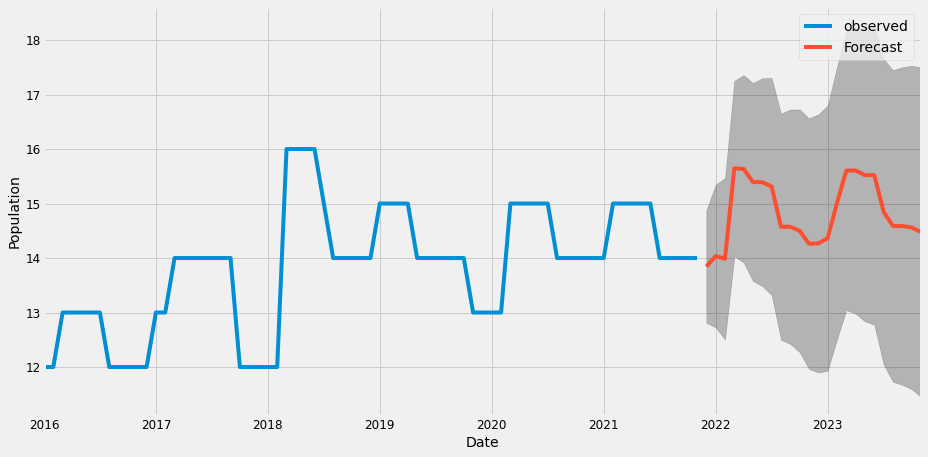

In [14]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Population')
plt.legend()
plt.show()

In [15]:
pred_uc.predicted_mean

2021-12-31    13.843974
2022-01-31    14.036006
2022-02-28    13.986754
2022-03-31    15.644897
2022-04-30    15.634833
2022-05-31    15.394227
2022-06-30    15.391668
2022-07-31    15.311990
2022-08-31    14.574041
2022-09-30    14.573810
2022-10-31    14.499858
2022-11-30    14.264647
2022-12-31    14.266929
2023-01-31    14.364983
2023-02-28    15.004515
2023-03-31    15.605129
2023-04-30    15.605323
2023-05-31    15.521177
2023-06-30    15.521230
2023-07-31    14.850916
2023-08-31    14.587202
2023-09-30    14.587245
2023-10-31    14.560856
2023-11-30    14.476754
Freq: M, Name: predicted_mean, dtype: float64